In [123]:
import pandas as pd

In [124]:
import numpy as np

#https://www.geeksforgeeks.org/data-cleansing-introduction/?ref=lbp

# 1. Inspect titanic prediction data

In [125]:
df = pd.read_csv('titanic/train.csv')

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [129]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [130]:
for col in df.columns:
    print(col, df[col].dtype )

PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


In [132]:
df.shape

(891, 12)

# 2. Remove unwanted observations

In [133]:
#Remove the fields from df as it is not impacting the target

In [134]:
df2 = df.drop(['Name','Ticket'], axis = 1)

In [135]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


# 3. handle missing data

In [136]:
df2.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [137]:
df2.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### percentage of columns that are null or na

In [139]:
round( (df2.isnull().sum()/df2.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [140]:
round( (df2.isna().sum()/df2.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [141]:
### remove columns that are null most of times and least of tmes 

In [142]:
df3 = df2.drop(['Cabin'],axis = 1)

In [143]:
df4 = df3.dropna(axis = 0, subset = ['Embarked']) #drop records where this column value is null

In [144]:
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [145]:
df4.shape

(889, 9)

In [146]:
df4.Age.mean()

29.64209269662921

### mean imputation - assign mean value to age column which has null values

In [147]:
df5 = df4.fillna(df4.Age.mean())

In [148]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [150]:
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [151]:
df5.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# 4. handling outliers

In [155]:
import matplotlib.pyplot as plt

In [157]:
df5.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
df5.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

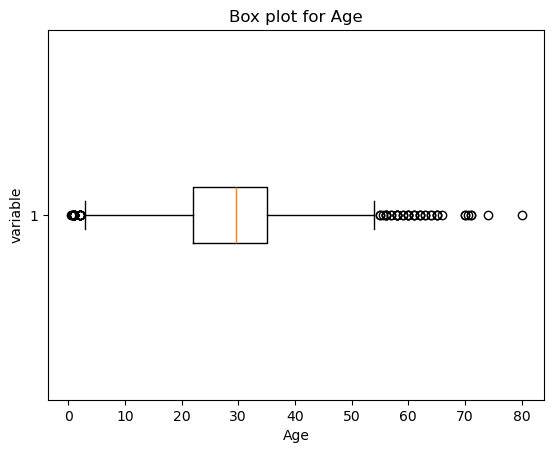

In [164]:
plt.boxplot(df5.Age, vert = False)
plt.xlabel('Age')
plt.ylabel('variable')
plt.title('Box plot for Age')
plt.show()

### calculate the lower and upperbound of age 

In [165]:
mean = df5.Age.mean()
std = df5.Age.std()
print(mean, std)

29.642092696629216 12.968346294351784


In [166]:
print('lower bound ', mean - 2*std, 'upper bound ', mean + 2*std)

lower bound  3.705400107925648 upper bound  55.578785285332785


# 4. Data preparation

### min max feature scaling

In [198]:
from sklearn.preprocessing import MinMaxScaler 
minmaxscaler = MinMaxScaler()

In [199]:
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [200]:
source = df5.drop(['Survived','PassengerId'], axis = 1)
source.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [201]:
target = df5.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [202]:
numeric_cols = [col for col in source.columns if source[col].dtype != 'object']
print(numeric_cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [203]:
for col in df5.columns:
    print(col, df5[col].dtype)

PassengerId int64
Survived int64
Pclass int64
Sex object
Age float64
SibSp int64
Parch int64
Fare float64
Embarked object


In [204]:
source[numeric_cols].head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


### fit and transform for min max scaling

In [206]:
source[numeric_cols] = minmaxscaler.fit_transform(source[numeric_cols])

In [196]:
source[numeric_cols].head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.0,0.014151
1,0.0,0.472229,0.125,0.0,0.139136
2,1.0,0.321438,0.000,0.0,0.015469
3,0.0,0.434531,0.125,0.0,0.103644
4,1.0,0.434531,0.000,0.0,0.015713
